<a href="https://colab.research.google.com/github/BeshoyAbdALMasih/house_price_predict/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df=pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [87]:
from pandas.plotting import scatter_matrix
columns1=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'median_house_value']

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='total_bedrooms', ylabel='housing_median_age'>,
        <Axes: xlabel='population', ylabel='housing_median_age'>,
        <Axes: xlabel='households', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='total_bedrooms', ylabel='total_rooms'>,
        <Axes: xlabel='population', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_bedrooms'>,
     

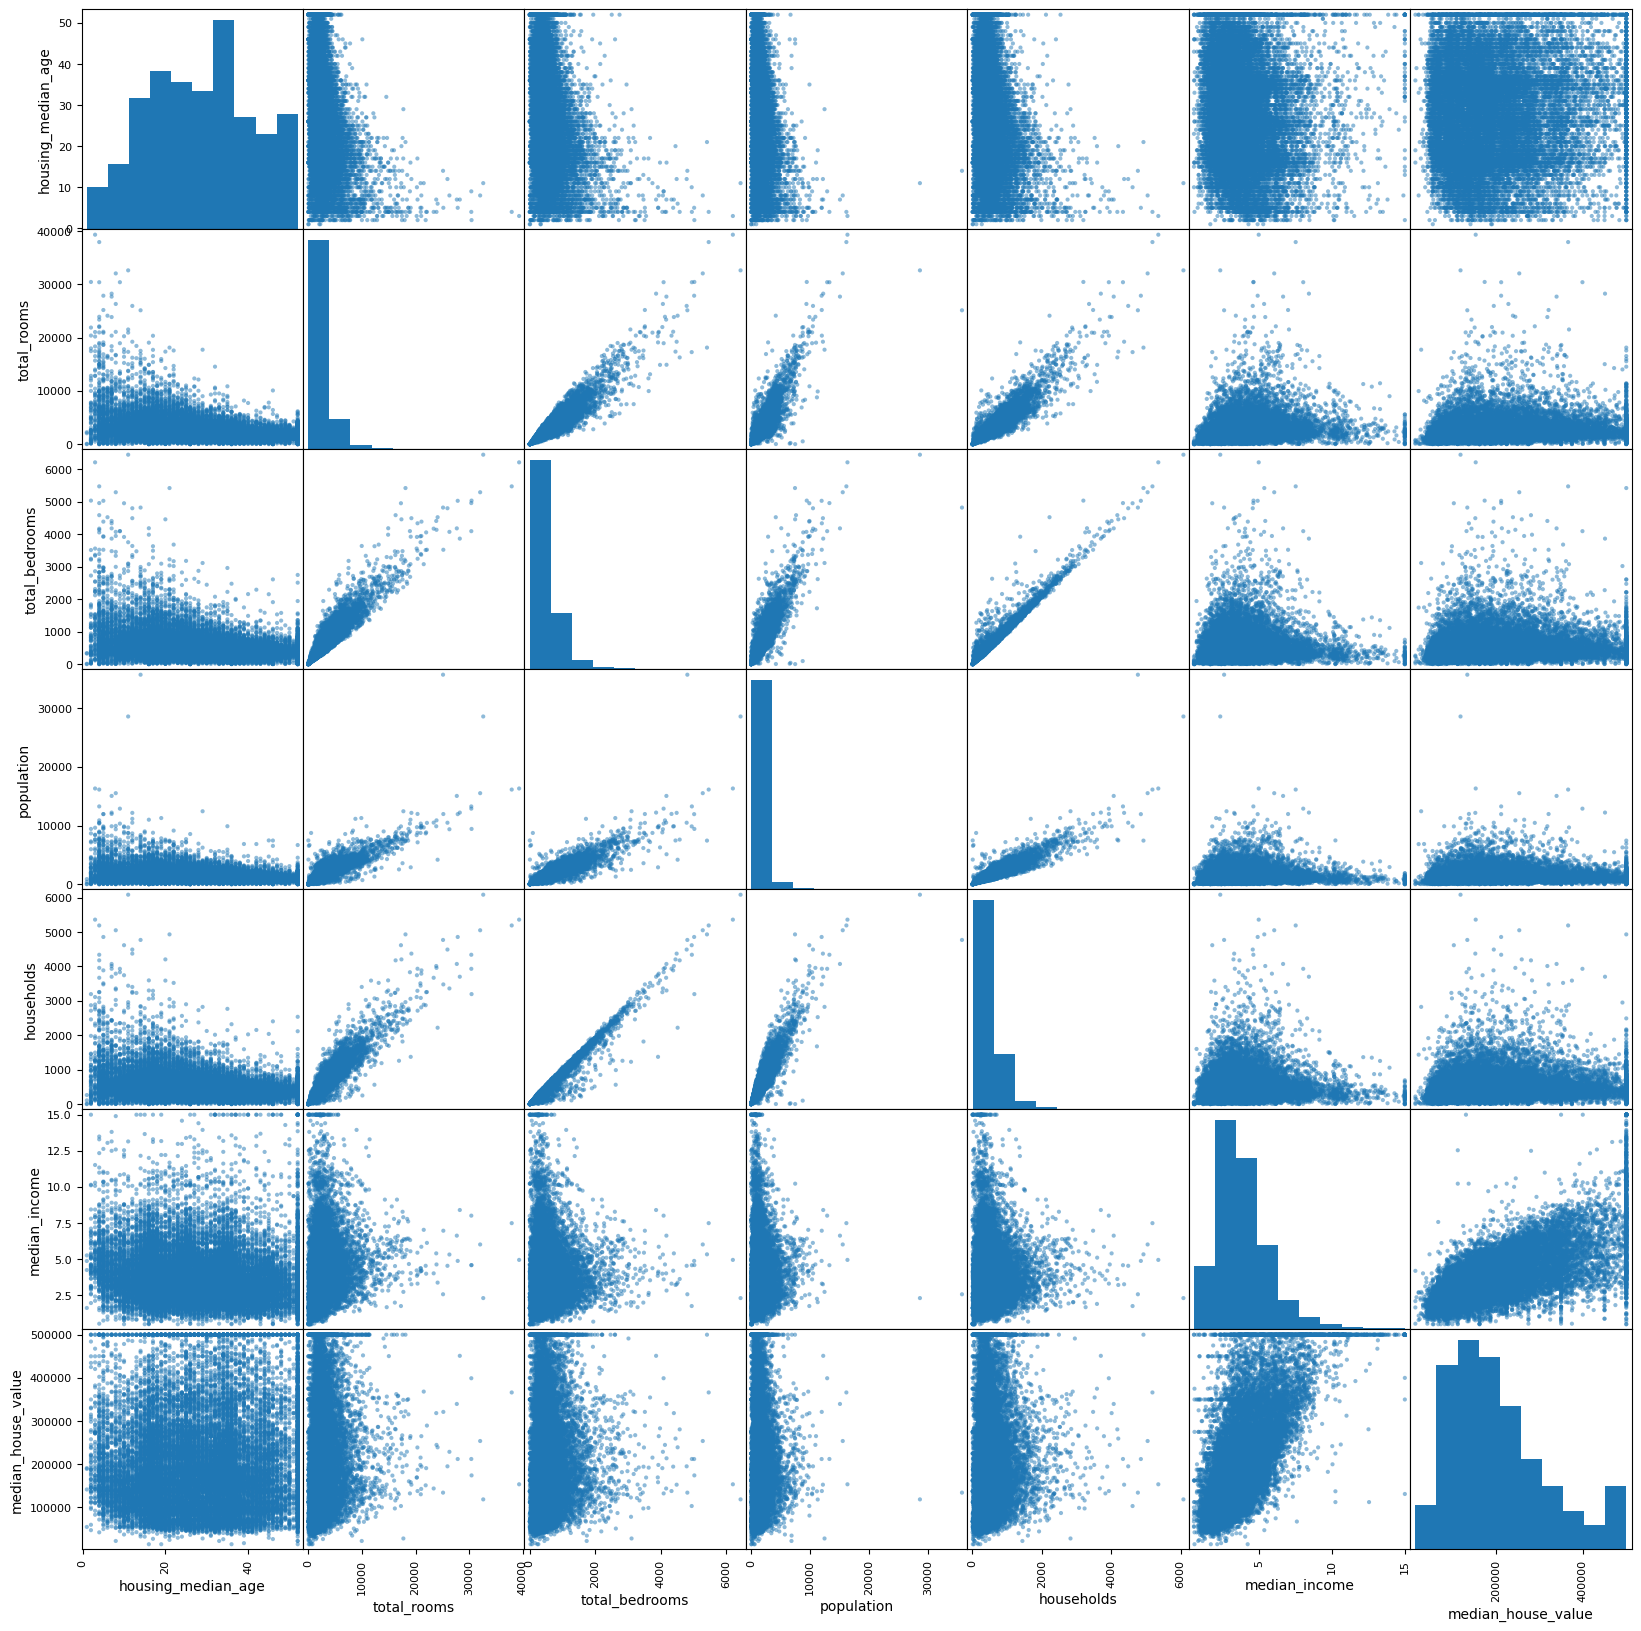

In [88]:
scatter_matrix(df[columns1],figsize=(20,20))

<Axes: xlabel='median_income', ylabel='median_house_value'>

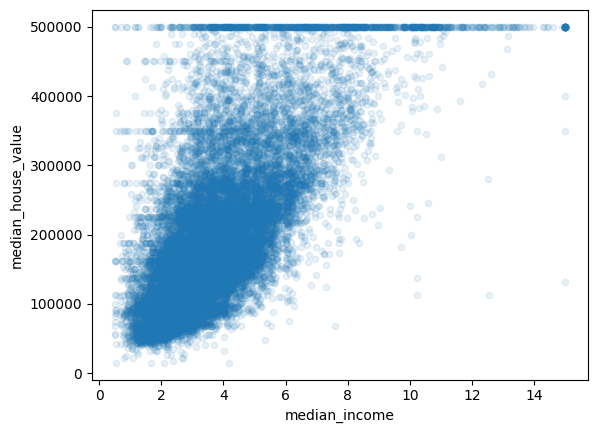

In [89]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X=df.drop('median_house_value', axis=1)
Y=df['median_house_value']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
print(x_train.columns)  # Check available columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [94]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
if 'ocean_proximity' in x_train.columns:
    x_train_encoded = encoder.fit_transform(x_train[['ocean_proximity']])
    x_test_encoded = encoder.transform(x_test[['ocean_proximity']])

    # Convert to DataFrame and merge
    x_train_encoded = pd.DataFrame(x_train_encoded, index=x_train.index)
    x_test_encoded = pd.DataFrame(x_test_encoded, index=x_test.index)

    x_train = pd.concat([x_train.drop(columns=['ocean_proximity']), x_train_encoded], axis=1)
    x_test = pd.concat([x_test.drop(columns=['ocean_proximity']), x_test_encoded], axis=1)
else:
    print("Column 'ocean_proximity' not found in x_train")


In [95]:
print(x_train.isnull().sum())
x_train=x_train.fillna(x_train.median())
x_test=x_test.fillna(x_test.median())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        162
population              0
households              0
median_income           0
0                       0
1                       0
2                       0
3                       0
4                       0
dtype: int64


In [97]:
from sklearn.preprocessing import StandardScaler
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train a simple model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 49040.11599979394


In [100]:
print(y_test.mean())  # Check the average house price


207252.01380813954


In [101]:
from sklearn.metrics import mean_absolute_error

median_price = y_train.median()
baseline_preds = [median_price] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_preds)

print(f"Baseline MAE: {baseline_mae}")


Baseline MAE: 89210.8800872093


In [102]:
percentage_error = (49040 / y_test.mean()) * 100
print(f"MAE as percentage of avg price: {percentage_error:.2f}%")


MAE as percentage of avg price: 23.66%


# Using xgboost cuz it much better XD

In [103]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f"New MAE: {mae}")


New MAE: 32640.142578125


In [104]:
percentage_error = (32640 / y_test.mean()) * 100
print(f"MAE as percentage of avg price: {percentage_error:.2f}%")


MAE as percentage of avg price: 15.75%


> # last but not least thanks for cahtgpt for helping a lot


